In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
df = pd.read_csv('/content/state_data (3).csv')

In [3]:
df.head()

,State,Population,Literacy_Rate,Area (sq miles),Crime_Rate_2018,Crime_Rate_2019,Crime_Rate_2020,Crime_Rate_2021,crime_types
0,Alabaster,4071934,71.045025,75282,24.207541,49.322999,6.129793,47.335629,Prostitution
1,Birchwood,3736079,81.537574,48180,0.176311,1.919923,20.852806,6.447428,Credit Card Fraud
2,Coral Springs,8561037,97.533103,75477,48.991902,19.590637,21.014260,21.944465,Human Trafficking
3,Dandelion,1677009,84.761921,62721,28.222929,45.320563,23.610466,21.112958,Money Counterfeiting
4,Elmdale,1378307,88.446342,31601,33.963864,46.854024,31.364820,9.791292,Prostitution


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            120 non-null    object 
 1   Population       120 non-null    int64  
 2   Literacy_Rate    120 non-null    float64
 3   Area (sq miles)  120 non-null    int64  
 4   Crime_Rate_2018  120 non-null    float64
 5   Crime_Rate_2019  120 non-null    float64
 6   Crime_Rate_2020  120 non-null    float64
 7   Crime_Rate_2021  120 non-null    float64
 8   crime_types      120 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 8.6+ KB


In [5]:
df.rename(columns = {'Area (sq miles)':'Area'}, inplace = True)

In [6]:
df['State'] = df['State'].astype('category')
df['crime_types'] = df['crime_types'].astype('category')

In [7]:
df.columns[df.dtypes=='category']

Index(['State', 'crime_types'], dtype='object')

In [8]:
df.dtypes[df.dtypes=='float64']

Literacy_Rate      float64
Crime_Rate_2018    float64
Crime_Rate_2019    float64
Crime_Rate_2020    float64
Crime_Rate_2021    float64
dtype: object

In [9]:
df.dtypes[df.dtypes=='int64']

Population    int64
Area          int64
dtype: object

In [10]:
df.describe()

,Population,Literacy_Rate,Area,Crime_Rate_2018,Crime_Rate_2019,Crime_Rate_2020,Crime_Rate_2021
count,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.121901e+06,85.567571,47930.191667,24.864775,24.208188,24.973129,24.761643
std,2.788680e+06,8.297655,27753.097339,14.430119,14.642355,14.447865,14.770212
min,1.615540e+05,70.276084,1114.000000,0.176311,0.098167,0.869240,0.284371
25%,2.639348e+06,79.186202,24109.750000,12.349519,11.647454,12.985896,12.919997
50%,5.315772e+06,84.847809,47767.000000,25.352874,23.922980,23.930476,22.475470
75%,7.247988e+06,93.412818,71173.750000,36.526374,36.162652,36.877803,36.950016
max,9.878387e+06,99.420774,99486.000000,49.644305,49.802475,49.895435,49.970972


## Univariate-Analysis : Numerical Variables

In [11]:
num_cols = ['Literacy_Rate','Crime_Rate_2018','Crime_Rate_2019','Crime_Rate_2020','Crime_Rate_2021','Population','Area']


In [12]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (9*size,6), dpi = 150)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], fill=True)

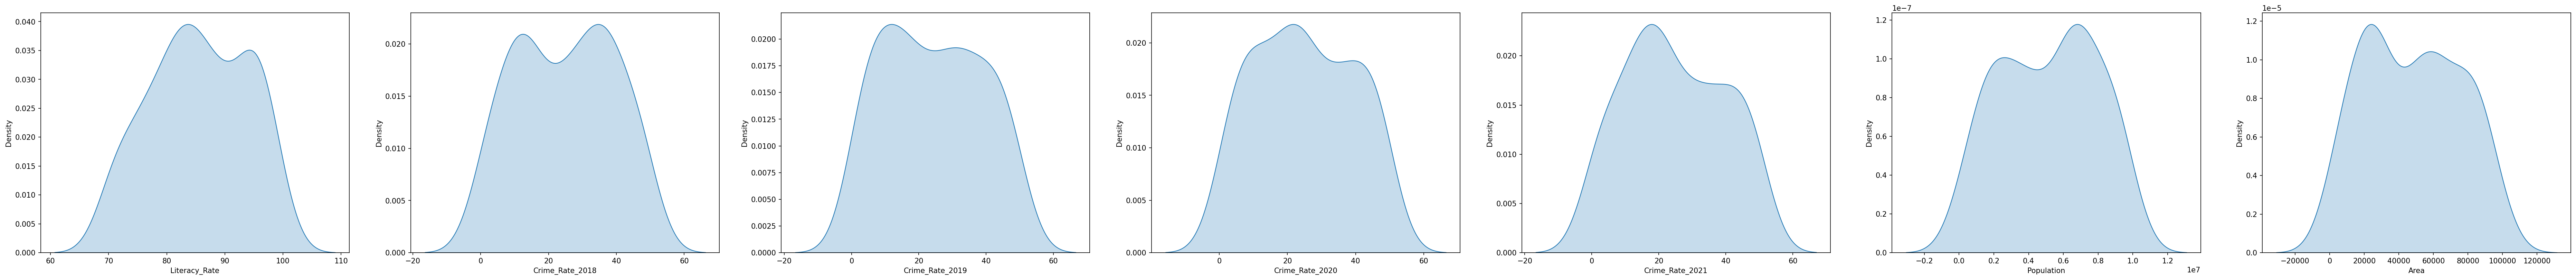

In [13]:
UVA_numeric(df,num_cols)



*   All the columns are bi-modal but nearly normally distributed
*   most states have a literacy rate near to 80%
* if we compre the position of peaks of crime rates for the yers 2018, 2019, 2020, 2021 we can see that they are all nearly the same we can not see any increasing or decreasing trends. Even the distributions are somewhat similar.



## Univariate-Analysis : Categorical Variables

In [14]:
cat_cols = ['State','crime_types']

In [15]:
df['State'].unique()

['Alabaster', 'Birchwood', 'Coral Springs', 'Dandelion', 'Elmdale', ..., 'Pastel Plateau', 'Quizzical Quarry', 'Radiant Ravine', 'Serene Summit', 'Tranquil Tundra']
Length: 120
Categories (120, object): ['Alabaster', 'Ambrosia', 'Astral Acres', 'Astronomical Annex', ...,
                           'Zen Garden', 'Zenith', 'Zenith Zen', 'Zephyr Zone']

There are 120 unique states

Top 10 crimes



<Axes: >

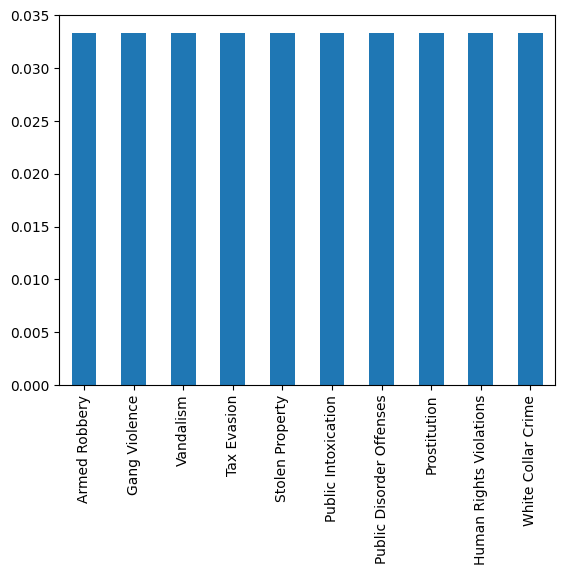

In [16]:
(df['crime_types'].value_counts().head(10) / len(df)).plot.bar()

## Bi-Variate Analysis

### Analysis of Population vs Each state

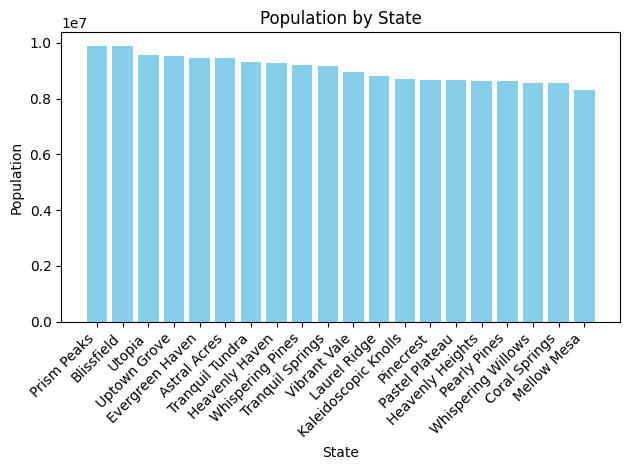

In [17]:
df2 = df.sort_values(by='Population', ascending=False)

# Plotting the bar chart
plt.bar(df2['State'].head(20), df2['Population'].head(20), color='skyblue')
plt.xlabel('State')
plt.ylabel('Population')
plt.title('Population by State')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()


Above are the top 20 states with largest population

### Literacy rate vs State

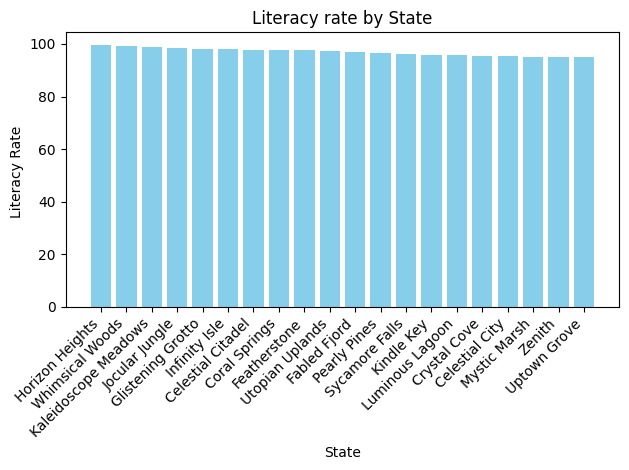

In [18]:
df2 = df.sort_values(by='Literacy_Rate', ascending=False)

# Plotting the bar chart
plt.bar(df2['State'].head(20), df2['Literacy_Rate'].head(20), color='skyblue')
plt.xlabel('State')
plt.ylabel('Literacy Rate ')
plt.title('Literacy rate by State')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

### Area vs State

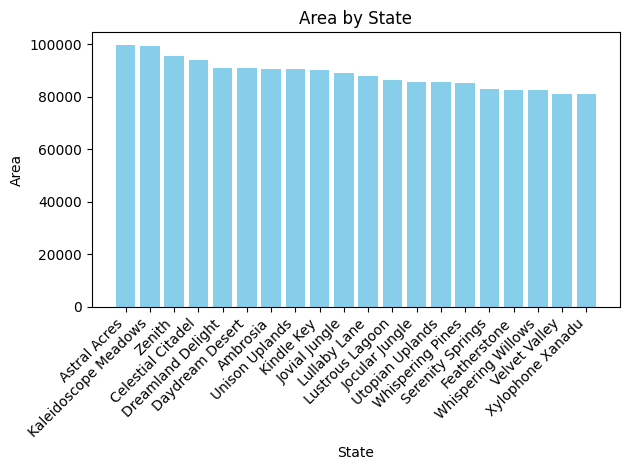

In [19]:
df2 = df.sort_values(by='Area', ascending=False)

# Plotting the bar chart
plt.bar(df2['State'].head(20), df2['Area'].head(20), color='skyblue')
plt.xlabel('State')
plt.ylabel('Area')
plt.title('Area by State')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

### Analysis of Literacy_rate vs Total Crimes

Formula for total crimes = (crime_rate * population)/100.

We can create a new column for total crimes based on this formula

In [20]:
df['Total_crimes2021'] = df['Crime_Rate_2021']*df['Population']/100

In [21]:
df.head()

,State,Population,Literacy_Rate,Area,Crime_Rate_2018,Crime_Rate_2019,Crime_Rate_2020,Crime_Rate_2021,crime_types,Total_crimes2021
0,Alabaster,4071934,71.045025,75282,24.207541,49.322999,6.129793,47.335629,Prostitution,1.927476e+06
1,Birchwood,3736079,81.537574,48180,0.176311,1.919923,20.852806,6.447428,Credit Card Fraud,2.408810e+05
2,Coral Springs,8561037,97.533103,75477,48.991902,19.590637,21.014260,21.944465,Human Trafficking,1.878674e+06
3,Dandelion,1677009,84.761921,62721,28.222929,45.320563,23.610466,21.112958,Money Counterfeiting,3.540662e+05
4,Elmdale,1378307,88.446342,31601,33.963864,46.854024,31.364820,9.791292,Prostitution,1.349541e+05


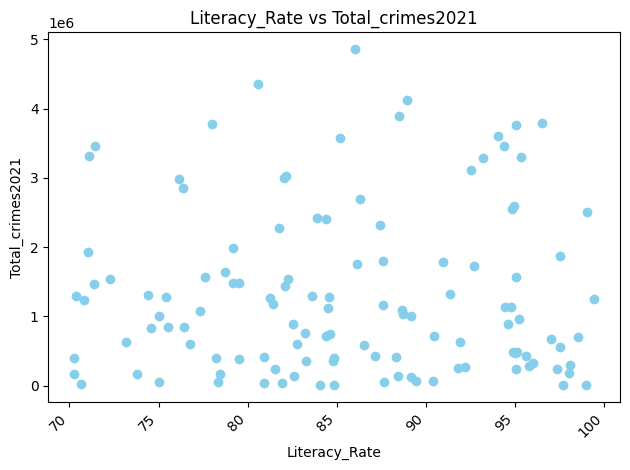

In [22]:
df3 = df.sort_values(by = 'Literacy_Rate', ascending = False)
plt.scatter(df3['Literacy_Rate'], df3['Total_crimes2021'], color='skyblue')
plt.xlabel('Literacy_Rate')
plt.ylabel('Total_crimes2021')
plt.title('Literacy_Rate vs Total_crimes2021')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

From the scatter plot we can see that Literacy rate does not have a clear effect on crime rate.

### Analysis of the type of crime vs each state vs Literacy_rate

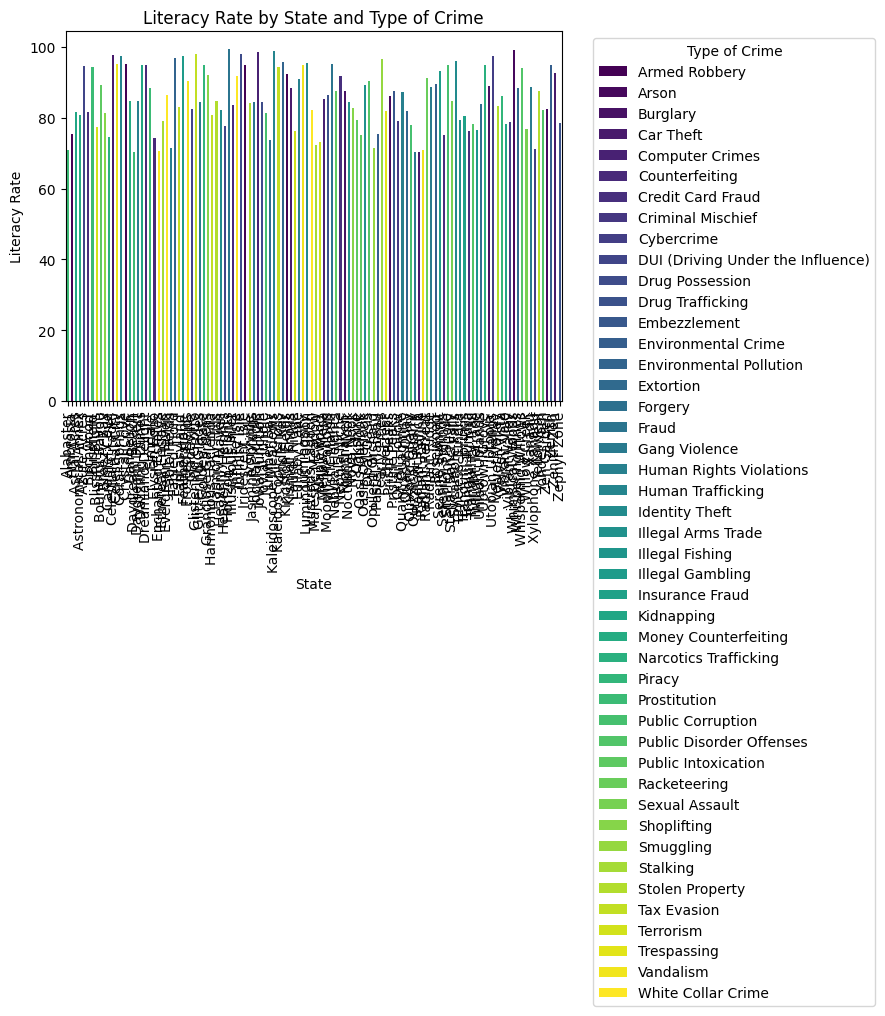

In [23]:
grouped_df = df.groupby(['State', 'crime_types']).mean().reset_index()
pivot_df = grouped_df.pivot(index='State', columns='crime_types', values='Literacy_Rate').fillna(0)

# Plotting the bar chart
pivot_df.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('State')
plt.ylabel('Literacy Rate')
plt.title('Literacy Rate by State and Type of Crime')

# Display the legend
plt.legend(title='Type of Crime', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Analysis of area vs overall crime

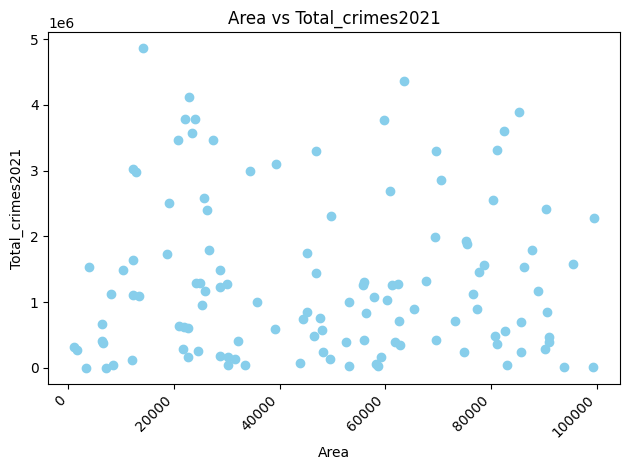

In [24]:
plt.scatter(df['Area'], df['Total_crimes2021'], color='skyblue')
plt.xlabel('Area')
plt.ylabel('Total_crimes2021')
plt.title('Area vs Total_crimes2021')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

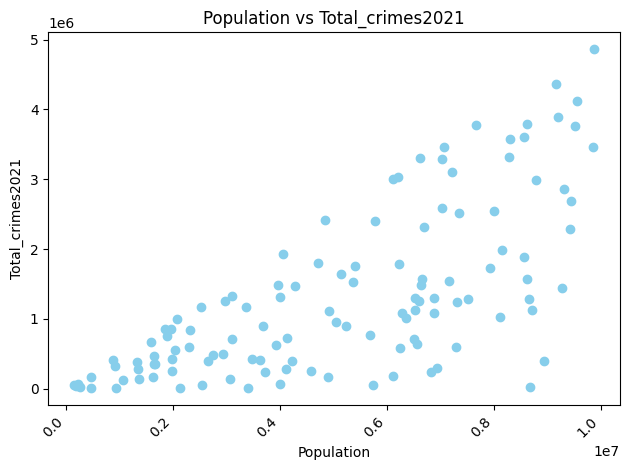

In [25]:
plt.scatter(df['Population'], df['Total_crimes2021'], color='skyblue')
plt.xlabel('Population')
plt.ylabel('Total_crimes2021')
plt.title('Population vs Total_crimes2021')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

We can see a clear increasing trend in total crimes with increasing population.

### Clustering Model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

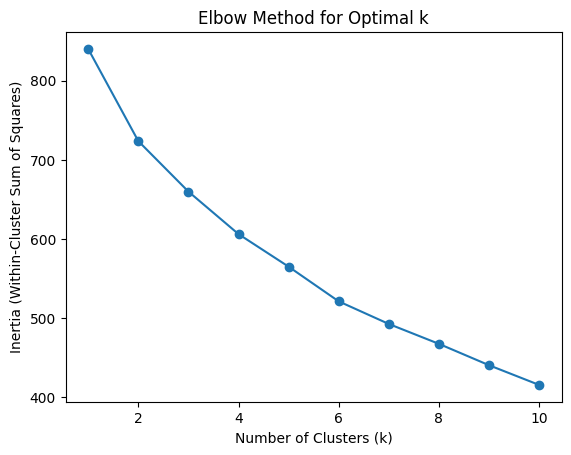

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


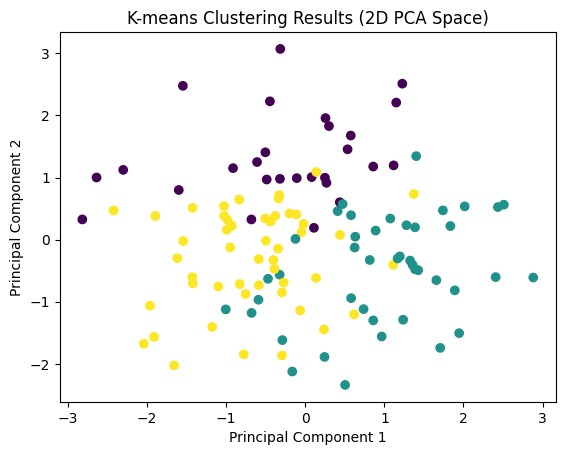

                State  Cluster
0           Alabaster        1
1           Birchwood        2
2       Coral Springs        0
3           Dandelion        0
4             Elmdale        0
..                ...      ...
115    Pastel Plateau        1
116  Quizzical Quarry        1
117    Radiant Ravine        1
118     Serene Summit        1
119   Tranquil Tundra        1

[120 rows x 2 columns]


In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select relevant columns for clustering
columns_for_clustering = ['Population', 'Area', 'Literacy_Rate', 'Crime_Rate_2018', 'Crime_Rate_2019', 'Crime_Rate_2020', 'Crime_Rate_2021']

X = df[columns_for_clustering]

# Standardize the features by scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering with different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method to find the optimal number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

# Choose the optimal k based on the elbow point in the plot
optimal_k = 3  # Change this based on your observation of the elbow point

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
df['Cluster'] = cluster_labels

# Optionally, you can perform dimensionality reduction (e.g., using PCA) for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Visualize the clusters in 2D space (PCA space)
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering Results (2D PCA Space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display the dataset with cluster labels
print(df[['State', 'Cluster']])
